<a href="./img/module5logo.png"><center> <img src="./img/module5logo.png" alt="Drawing" style="width: 600px;"/> <center/><a/>

# **Protein Sequences Analysis (Coronavirus Case Study)**

**Protein sequence analysis** covers a broad field of any analytical methods used to study a protein sequence's features, function, structure, or evolution. In bioinformatics, protein sequence analysis is the study of the same using **computational approaches**. These approaches are vast and include sequence alignments, clustering, modelling, and other methods.

Most of you are likely familiar with these methods using one of the various online tools (do not worry if you are not). These online tools are convenient, but sometimes you want to do something a little bit different, or create a pipeline using multiple tools, and then they are suddenly inconvenient to use. This is where a little bit of programming can really push your bioinformatic capabilities and skills. 

The **Python** programming language is one of, if not the, most widely used programming language for creating bioinformatic tools. Many of the above mentioned online tools are therefore also accessible through Python, allowing you to work with them in a more flexible manner. The main purpose of our series of lectures is therefore to introduce you to biological data-science analysis, modelling, visualization and machine-learning in Python. The emphasis of these materials is not just to introduce users to practical biological data-science techniques, but also demonstrate scientific analysis of results through the lens of academic and biotechnological research. 

<div class="alert alert-info"> <font color=black> <b>In this notebook</b> we will introduce you to protein sequence clustering using 3 different methods (<b>PCA</b>, <b>t-SNE</b> and <b>UMAP</b>), how to visualize sequences in <b>logoplots</b> and what you can derive from such analysis.

As a <b>case study</b>, we will be looking at a data set of coronavirus antibodies and look at the difference between antibodies binding <b>SARS-CoV-2</b> (the cause of COVID-19) and antibodies binding other coronavirus. With the help of the introduced clustering techniques and logoplots, we hope to illustrate how you can identify clusters of similar proteins within a set of proteins and how you can visualize the differences in their protein sequences. As the introduced approaches are broadly applicable we hope to enable you to do adapt these techniques and apply them to your own data sets.
</font></div>

**Run the below jupyter cell and watch the short introduction to the notebook by Prof. Paolo Marcatili.**

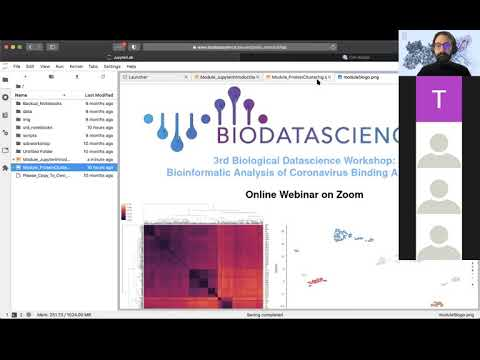

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('ucpVSnBPrFc', width=800, height=600)

<div class="alert alert-info fade show" role="alert"><font color=black>We have estimated that it will take <b>between 2-4 hours</b> to go through the notebook. The structure of the module consists of introducing each new tool when needed, combined with elaborating text and links for deeper understanding. If you are completely new to Jupyter, it is recommended to look at the notebook <b>Module_JupyterIntroduction</b>, seen in the left side menu, before continuing. Additionally, there will be questions throughout the notebook to help you think about how you are using these tools. We have divided the questions into normal and advanced, where we recommend you try and answer </font> </div> 

<div class="alert alert-success fade show" role="alert">
    <font color=black>the <b>normal questions</b>, highlighted in green, and,</font> 
</div> 
<div class="alert alert-warning"> 
    <font color=black> if you want to be challenged, the <b>advanced questions</b> highlighted in yellow. </font> 
</div> 
<div class="alert alert-info"> 
    <font color=black> Additionally, we have tried to ensure that the <b>most important parts</b> to read are highlighted in blue. </font> 
</div> 

If you are looking to challenge yourself further, it is also recommended to play around with the parameters for each tool. We will be using default parameters most of the time, so optimizing the parameters could greatly improve the results.

In the end, we hope you have learned the following learning objectives.

### **Learning Objectives**

**Users will after this notebook be able to:**

   1. Perform an initial bioinformatic analysis of a group of related protein sequences,
   
   2. Be able to cluster protein sequences into relevant clusters, and
   
   3. Extract information to help further analysis of the protein sequences by visualizing the differences within and between these clusters. 
   
**To enable the above, this notebook is designed to give users an introduction to the following methods and tools:**

   1. Create a sequence identity distance matrix based on a set of protein sequences using Biotite,
   
   2. Apply different dimension reduction tools (e.g. PCA, t-SNE and UMAP) using scikit-learn,
   
   3. Cluster with DBSCAN using scikit-learn, and
   
   4. Evaluate and compare clusters with logoplots using Logomaker.

------

## **Introduction to Case Study**

As SARS-CoV-2 (the causes of COVID-19) has been spreading across the world, it has become a heavily researched virus. Researchers want to understand its mechanisms and the way it spreads in order to create a vaccine or invent a treatment. In this notebook we will not go into any details of the exact mechanisms of SARS-CoV-2 or how our body defends against it. Instead, we will look at different antibodies binding to not only SARS-CoV-2 but also the closely related coronaviruses SARS-CoV-1 and MERS. <a href="https://www.who.int/emergencies/diseases/novel-coronavirus-2019/covid-19-vaccines/how-do-vaccines-work">This is a nice short description of the role of antibodies.</a>

We will simulate a research pipeline where we try and differentiate between the different antibodies based on their protein sequence and see if we can find specific areas in the sequences which might be of relevance for the binding.


<a href="./img/coronavirus1.png"><center> <img src="./img/coronavirus1.png" alt="Drawing" style="width: 600px;"/> <center/><a/>
Figure taken from: https://www.nih.gov/news-events/news-releases/clinical-trials-monoclonal-antibodies-prevent-covid-19-now-enrolling


Although, understanding the protein sequences you work with allows you to understand your results better or that you investigate the important things of the protein, it is not always the case that the relevant information is available. This pipeline can therefore both be used as an initial investigation of the sequences or as a validation to what you expect. As antibodies have been extensively researched, there is a lot of literature on them;

<a href="https://pdb101.rcsb.org/motm/21">this is a good short and concise description of antibodies</a>, while 

<a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7380193/">this is a much more comprehensive and well written review of antibodies</a>.


    
<a href="./img/antibody.jpg"><center> <img src="./img/antibody.jpg" alt="Drawing" style="width: 600px;"/> <center/><a/>
Figure taken from: https://step1.medbullets.com/immunology/105060/antibodies
    
As seen in the figure above, an antibody can be divided into different regions. As the <b>VH (the variable domain on the heavy chain) region</b> is the area which is most involved in binding to pathogens (antigens), we will only be looking at sequences for this area. 

<div class="alert alert-info"> <font color=black>
The data we will be working with in this module comes from the <a href="http://opig.stats.ox.ac.uk/webapps/covabdab/"> CoV-AbDab database</a>. This database was created by the <a href="http://opig.stats.ox.ac.uk/"> Oxford Protein Informatics Group</a> at Oxford and is continuously being updated as new data becomes available.
</font> </div>

### **Preparing the data**
<div class="alert alert-info"> <font color=black> 
For the analysis we are going to do, we want to prepare the data so we have two columns. A column with the antibody sequence and a column with noting the virus and epitope which the antibody sequence binds to.</font> </div>

Usually the data has been prepared by someone else and/or the data is very extensive including a lot of irrelevant information for your analysis. Data preparation is an important first step where we remove irrelevant data and prepare the parts we are interested in for our analysis.

<div class="alert alert-info"> <font color=black> 
For handling and working with the data, we will be using the Python library <a href="https://pandas.pydata.org/about/index.html"> Pandas</a>. This is a great tool when it comes to speed and nicely visualising the data, but most important, it contains a wide variety of functions for data handling. We have already downloaded the csv data set file from the CoV-AbDab website, so you just need to load it in. Here we will see Pandas shine for the first time, by using the <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html">.read_csv()</a> function to read in our csv file. Pandas stores data in a <a href="https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html">pandas DataFrame</a>, and we will therefore call our data covDF (coronavirus DataFrame). The majority of Pandas functions can be used directly from a Pandas DataFrame, meaning if we want to use the Pandas function <b>head(2)</b> to show the two first rows of covDF, we add it to covDF using a dot as a separator, e.g. covDF.head(2). </font> </div>

In [2]:
import pandas as pd
covDF = pd.read_csv('./data/CoV-AbDab_091120.csv')
covDF.head(2)

,Name,Ab or Nb,Binds to,Doesn't Bind to,Neutralising Vs,Not Neutralising Vs,Protein + Epitope,Origin,VH or VHH,VL,...,Light J Gene,CDRH3,CDRL3,Structures,ABB Homology Model (if no structure),Sources,Date Added,Last Updated,Update Description,Notes/Following Up?
0,Fab-52,Ab,SARS-CoV2,NaN,SARS-CoV2,NaN,S; RBD,"Phage Display Library (Antibody, human, non-im...",QVQLVQSGAEVKKPGSSVKVSCKASGYTFTSYGISWVRQAPGQGLE...,DIQMTQSPSSLSASVGDRVTITCRASQGISNNLNWYQQKPGKAPKL...,...,IGKJ3 (Human),ARDRGDTIDY,QQGNGFPLT,https://www.rcsb.org/structure/7K9Z,NaN,"Edurne Rujas et al., 2020 (https://www.biorxiv...","Nov 2, 2020","Nov 2, 2020",NaN,Complete
1,Fab-298,Ab,SARS-CoV2,NaN,SARS-CoV2,NaN,S; RBD,"Phage Display Library (Antibody, human, non-im...",QVQLVQSGAEVKKPGASVKVSCKASGGTFSTYGISWVRQAPGQGLE...,DIVMTQSPDSLAVSLGERATINCKSSQSVLYSSNNKNYLAWYQQKP...,...,IGKJ2 (Human),ASDPRDDIAGGY,QQYYSTPPT,https://www.rcsb.org/structure/7K9Z,NaN,"Edurne Rujas et al., 2020 (https://www.biorxiv...","Nov 2, 2020","Nov 2, 2020",NaN,Complete


From looking at the two first data points above, we see our data contains a variety of information (23 different columns!) for each sequence. This information can be used for a number of different analysis, but in our case we are only interested in the variable heavy chain protein sequence (**VH or VHH**), which coronavirus it has been shown to bind to (**Binds to**) and the epitope on the virus (**Protein + Epitope**). This is because we are interested in investigating different antibody sequences binding to different epitopes on the different coronavirus. While **VH** is the variable heavy chain on antibodies, **VHH** is the variable chain on <a href="https://www.azolifesciences.com/article/VHH-Antibodies-(Nanobodies)-Advantages-and-Limitations.aspx">nanobodies</a>. There are some differences in their sequences, but for now we will not differentiate.

<div class="alert alert-info"> <font color=black> 
Pandas have different ways of extracting subparts of a DataFrame, with a more in-depth description of how to select rows and columns being found <a href="https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html">here</a>. We will use the double square brackets, which extracts the columns written inside them from the DataFrame. Another handy Pandas function is <b>.rename()</b> which can be used to rename rows and columns as seen below.
</font> </div>

In [3]:
covDF = covDF[['VH or VHH', 'Binds to', 'Protein + Epitope']] # Selecting columns of interest
covDF.rename(columns={'Protein + Epitope':'BindEpitope','Binds to': 'BindVirus', 'VH or VHH':'Sequence'}, inplace=True) # Renaming of columns

### **Cleaning the data**

Most data sets come in a somewhat raw format and will need some cleaning before you can do your analysis. In our case we have the three columns **Sequence**, **BindEpitope** and **BindVirus**, which we need to make sure does not contain any weird stuff. In most cases, you do not know what weird stuff exists inside your data and it is therefore an important first step to look through it. 

<div class="alert alert-info"> <font color=black> 
Using the <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html">.value_counts()</a> function on the <b>BindVirus</b> column allows us to see all the different values within this column and how often they occur. .to_frame() allows for a nicer view of the data (try removing it).
</font> </div>

In [4]:
covDF['BindVirus'].value_counts().to_frame()

,BindVirus
SARS-CoV2,988
"SARS-CoV1, SARS-CoV2",286
MERS-CoV,147
SARS-CoV1,112
SARS-CoV2 (weak),35
"HKU1 (weak), SARS-CoV1 (weak), SARS-CoV2 (weak)",16
"HKU1, SARS-CoV1 (weak), SARS-CoV2 (weak)",8
Bovine-CoV,7
"229E, HKU1 (weak), NL63, SARS-CoV1 (weak), SARS-CoV2 (weak)",6
"SARS-CoV1, SARS-CoV2, NL63 (weak)",5


As seen above, most of the antibodies in our data set have been found to bind to SARS-CoV1, SARS-CoV2, MERS-CoV or both SARS-CoV1 and SARS-CoV2. For other viruses, combination of viruses or weaker bindings, there is less data. For our analysis we need enough sequences for each type we inspect to properly create clusters. Instead of throwing away these low occurring cases, we could try and group them together with other data, such as SARS-CoV2 (weak) with SARS-CoV2. This might let us retain more information, but grouping things which should not be grouped might introduce some bias in our data and what we derive from it.

<div class="alert alert-info"> <font color=black>
Instead of justifying how we group data, we will make a simple cut-off and only include data viruses or combinations of viruses with more than 100 binders. This means we will only look at sequences binding to <b>SARS-CoV1</b>, <b>SARS-CoV2</b>, both <b>SARS-CoV1</b> and <b>SARS-CoV2</b> or <b>MERS-CoV</b>. This excludes a lot of data and is not necessarily the correct approach, but it is a good example of the kind of choices you have to make. To illustrate how to change values within a column we use <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html">.replace()</a> to change <b>SARS-CoV2 (weak)</b> to <b>SARS-CoV2</b>.
</font> </div>

In [5]:
covDF['BindVirus'].replace('SARS-CoV2 (weak)', 'SARS-CoV2', inplace=True)
covDF = covDF.query("BindVirus in ['SARS-CoV1', 'SARS-CoV2', 'SARS-CoV1, SARS-CoV2', 'MERS-CoV']")

<div class="alert alert-info"> <font color=black>
Likewise, we will only look at data binding to the following epitopes on the virus': <b>S; RBD</b>, <b>S; non-RBD</b> and <b>S; NTD</b>. This allows us to look at differences between antibodies binding to the same proteins, e.g. <b>S; RBD</b>, but on different viruses. We left out <b>S; Unk</b> on purpose, as we are interested in knowing the exact epitope our antibodies binds to.
</font> </div>

In [6]:
covDF.BindEpitope.value_counts()

S; RBD                                     969
S; non-RBD                                 260
S; Unk                                     164
S; NTD                                      48
S; Possibly RBD                             32
S; S2                                       31
S; S1                                       27
Unk                                          9
S; S1 non-RBD                                6
S; S1 (non-RBD)                              4
S                                            4
S; non-RBD S1                                4
S; probably RBD (implied by clustering)      3
NP                                           2
S; RBD+non-RBD                               1
S1                                           1
S; RBD/non-RBD                               1
M                                            1
 S; RBD                                      1
Name: BindEpitope, dtype: int64

In [7]:
covDF = covDF.query("BindEpitope in ['S; RBD', 'S; non-RBD', 'S; NTD']")

Large text containing data sets are difficult to create as there are often multiple different sources which are curated into a single database. This can result in either spelling mistakes or a variable being spelled in different ways, e.g. using capital letters, white space or change of order. 

<div class="alert alert-success"> <font color=black>
    <b>Question 1:</b> Can you find examples of this in the data?
</font> </div>

<div class="alert alert-warning"> <font color=black>
    <b>Question 2:</b> Can you fix these examples?
</font> </div>

<div class="alert alert-info"> <font color=black>Lastly, let us look at the protein sequences. For some of the data the sequence was not determined, which we see is represented with an <b>ND</b> when using .value_counts(). As we need the sequence for our analysis, these values are removed with the .query() function.</font> </div>

In [8]:
covDF['Sequence'].value_counts()

ND                                                                                                                             178
EVQLVQSGGGVVQPGKSLRLSCAASGFAFSSYAMHWVRQAPGKGLEWVAVISYDGSNKYYADSVKGRFTISRDNSKNTLYLQMNSLRAEDTAVYYCARDRSYYLDYWGQGTLVTVSS            6
QITFKESGPTLVKPTETLTLTCTFSGFSVSTSGEGVGWIRQPPGKALEWLAVIYWDDDKRYSPSLKSRLTITRDTSKNQVVLTMTNMDPVDTATYYCAHRLWFRDAFDIWGQGTTVTVSS         5
EVQLVESGGGLVQPGRSLRLSCAASGFTFDDYAMHWVRQAPGKGLEWVSGISWNSGTIGYADSVKGRFIISRDNAKNSLYLQMNSLRPEDTALYYCAKDIIRQGEDGMDVWGQGTTVTVSS        4
QVQLAESGGGVVQPGRSLRLSCAASGFTFSSYAMHWVRQAPGKGLEWVAVISYDGSNKYYADSVKGRFTISRDNSKNTLYLQMNSLRAEDTAVYYCARSTSGSYYYGMDVWGQGTTVTVSS        4
                                                                                                                              ... 
EVQLVESGGGLVQPGGSLRLSCAASGITVSSNYMSWVRQAPGKGLEWVSLIYSGGSTYYADSVKGRFTISRDNSKNTLYLQMNSLRVEDTAVYYCARDHGMAAAGYNYWGQGTLVTVSS          1
QVQLQESGPGLVKPSETLSLTCTVSGGSINNYYWIWIRQPPGKGLEWIGYIYHSGSTNYNPSLKSRVTISVDTSKNQFSLKVS

In [9]:
covDF = covDF.query("Sequence!='ND'")

<div class="alert alert-info"> <font color=black>Protein sequences should only contain the 20 different amino acids, but because of sequencing methods and errors in the data generation, these seqeuences might sometimes contain other stuff. The following function <b>checkProtein</b> is a nice approach to quickly remove sequences which contains elements other than the 20 amino acids. </font> </div>

In [10]:
def checkProtein(sequence,  code="ARNDCEQGHILKMFPSTWYV"):
    for residue in sequence: 
        if residue not in code: 
            return False 
    return True

In [11]:
covDF = covDF[covDF['Sequence'].apply(checkProtein)]

Every data set has its own quirks that need to be fixed. For protein sequences in large data sets, a common needed step is the removal of duplications. Duplicate protein sequences are often derived from different studies finding the same sequences or for specific reasons to the data set. In our case, a VH sequence is paired with a specific variable light chain. The VH sequence might therefore have been paired with different light chains and therefore seen multiple times in the data set. Although, it might be interesting to know how often a sequence is seen it is not relevant in our analysis. 

<div class="alert alert-warning"> <font color=black> <b>Question 3:</b> How can you use Pandas to remove duplicate rows (data points)? </font> </div>

<div class="alert alert-info"><font color=black>Now that we have cleaned out data, we will merge the two columns <b>BindVirus</b> and <b>BindEpitope</b> into a single column called <b>Binds</b>. We only do this as it makes it easier for us to visualise different viruses binding to different epitopes. Lastly, we reset the index using .reset_index().</font></div>

In [12]:
covDF['Binds'] = covDF.apply(lambda x: '{} {}'.format(x.BindVirus, x.BindEpitope[3:]), axis=1)
covDF.reset_index(drop=True, inplace=True)
covDF.Binds.value_counts()

SARS-CoV2 RBD                   541
SARS-CoV2 non-RBD               133
SARS-CoV1, SARS-CoV2 non-RBD    122
SARS-CoV1, SARS-CoV2 RBD         95
MERS-CoV RBD                     81
SARS-CoV2 NTD                    42
SARS-CoV1 RBD                    39
SARS-CoV1 NTD                     4
MERS-CoV NTD                      2
Name: Binds, dtype: int64

<div class="alert alert-info"> <font color=black>It is worth noting that we only have very few cases of antibodies binding to SARS-CoV1 NTD  and MERS-CoV NTD. In our case we will go on, but if the NTD epitope is of less interest you might want to just remove these data points.</font> </div>

----

## **Numerical Representation**

Now that we have prepared our data it is time to create a numerical representation of the sequences. These numerical representations are needed in order to use dimension reduction and clustering. These representations can be features calculated from the sequences (e.g. <a href="https://doi.org/10.1101/625830">biophysical properties</a>), encodings (e.g. one-hot encodings) or they can be of a distance matrix. In our case we will use a distance matrix.

### **Distance Matrix**

A <a href="https://www.displayr.com/what-is-a-distance-matrix/">distance matrix</a> is a matrix showing the distance between each pair of data. In the below figure the distance between A and A (itself) is 0, as it is identical to itself, while the distance between A and B is 16. This distance can be an <a href="https://en.wikipedia.org/wiki/Euclidean_distance">Euclidean distance</a> based on a set of calculate features for a sequence or, as often used with protein sequences, it can be based on sequence identity. Sequence identity is often used because it is easy to calculate and the values are good for clustering sequences.

<a href="./img/distancematrix1.png"><center> <img src="./img/distancematrix1.png" alt="Drawing" style="width: 200px;"/> <center/><a/>
Figure taken from: https://www.displayr.com/what-is-a-distance-matrix/


<div class="alert alert-info"> <font color=black>
To enable us to do mathematical calculations on our protein sequences we represent the sequences with a <b>distance matrix</b>. This might not be the optimal way to represent the sequences, but it is a simple and efficient approach utilizing sequence identities. The downside with distance matrices are that they scale poorly with size, becoming extremely slow to calculate on large data sets.</font> </div>

There exists a number of tools which can calculate the sequence identity between two sequences. These tools can be divided into <a href="https://doi.org/10.1186/s13059-017-1319-7">alignment-free</a> and alignment-based tools. 

**Alignment-based tools, as its name suggests, aligns sequences either pairwise or in multiple sequence alignments (MSAs) before calculating the identity between a pair of aligned protein sequences. The identity is then based on matching the aligned residues.**
  * Examples: <a href="https://blast.ncbi.nlm.nih.gov/Blast.cgi">BLAST</a>

**Concurrently, alignment-free tools also live up to their name, and refers to all sequence identity tools which does not use alignments.** 
  * Examples: <a href="https://doi.org/10.1093/bioinformatics/btl158">CD-HIT</a> and <a href="https://www.drive5.com/usearch/manual/ublast_algo.html">uBLAST</a>

<div class="alert alert-info"> <font color=black>
As our protein sequences are highly related (all are antibodies) and our data set is not too large, we will use an alignment-based method. For this we will use the <a href="https://www.biotite-python.org/index.html">Biotite module</a>. This module has a build-in function which <b>creates an MSA</b> and <b>calculates the distance matrix</b> in one go (nice and simple).
</font> </div>

<div class="alert alert-info"> <font color=black>
    In order to use Biotite, we first need to <b>turn our sequences into Biotite objects</b>. For this we use Biotite's function <a href="https://www.biotite-python.org/apidoc/biotite.sequence.ProteinSequence.html">ProteinSequence()</a>. For the MSA we also need a <a href="https://en.wikipedia.org/wiki/Substitution_matrix">substitution matrix</a>, which we can get from the <a href="https://www.biotite-python.org/apidoc/biotite.sequence.align.html">align</a> module.
</font> </div>

In [13]:
from biotite.sequence import ProteinSequence, align

sequences = [ProteinSequence(seq) for seq in covDF.Sequence]
substitution_matrix = align.SubstitutionMatrix.std_protein_matrix()

The standard protein matrix (std_protein_matrix()) in Biotite is <a href="https://en.wikipedia.org/wiki/BLOSUM">BLOSUM62</a>, a substitution matrix which has become the standard within protein alignment. The matrix is used to help create the MSA and has a large say in how the alignment will be. <a href="https://www.nature.com/articles/nbt0804-1035">This</a> text nicely explains where it comes from and some counterintuitive points about the BLOSUM scores.

<div class="alert alert-warning"> <font color=black><b>Question 4:</b> What would be the simplest substitution matrix and what is a common name for it? </font> </div>

<div class="alert alert-info"> <font color=black>
Finally we use the align_multiple function from the align module to create the alignment and distances (distance matrix).
</font> </div>
<div class="alert alert-info"> <font color=black><b>NOTE:</b> Running the code in the below jupyter cell <b>takes around 15-30mins</b>. We have therefore pre-computed and saved them with the prefix <b>_precomputed</b>. This distance matrix and MSA can be read in using the jupyter further below. If you want to run it you need to remove the <b>#</b>. If you regret having started the below cell you can cancel it by clicking on the black square (<b>interrupt the kernel</b>) next to the Run buttom. 
</font> </div>

In [14]:
###### This cell takes 15-30mins to run. If you do not want to run it, just use the pre-computed distance matrix and MSA in the jupyter cell below this

#alignment, _, _, distances = align.align_multiple(sequences, substitution_matrix)

#msaDF = pd.DataFrame(alignment.get_gapped_sequences(), columns=['AlignedSequence'], index=covDF.index)
#msaDF = pd.concat([msaDF, covDF.Binds], axis=1)
#msaDF.to_csv('./data/MSA_custom.csv', index=False)

#distDF = pd.DataFrame(distances, index=covDF.index)
#distDF = pd.concat([distDF, covDF.Binds], axis=1)
#distDF.to_csv('./data/DistMat_custom.csv', index=False)

In [15]:
###### Use this distance matrix and MSA instead of waiting for 15-30mins

distDF = pd.read_csv('./data/DistMat_precomputed.csv')
msaDF = pd.read_csv('./data/MSA_precomputed.csv')

In [16]:
msaDF.head().AlignedSequence.values

array(['-QVQLVQSGAEVKKPGSSVKVSCKASGYTFTS-Y-GIS----WVRQAPGQGLEWM--GGIIP-MFGTTNYAQKFQGRVTITADKSTSTAYMELSSLRSEDTAVYYCA--------R-DR------G-D-TIDY----WGQGTLVTVSS',
       '-QVQLVQSGAEVKKPGASVKVSCKASGGTFST-Y-GIS----WVRQAPGQGLEWM--GWISP-NSGGTDLAQKFQGRVTMTRDTSTSTVYMELSSLRSEDTAVYYCA--S-DP--R--D-DIA-G------GY----WGQGTLVTVSS',
       '-EVQLVESGGGLVKPGGSLRLSCAASGFTFSN-AW-M----SWVRQAPGKGLEWV-GRIKSKTDGGTTDYAAPVKGRFTISRDDSKNTLYLQMNSLKTEDTAVYYC---TT-G-S-----E--TYYYD-SSGP-FDYWGQGTLVTVSS',
       '-EVQLVESGGDSVQPGGSLRLSCAAAGFTFSS-YW-M----NWVRQAPGKGLEWV-AN-IK-QDGSEKYYVDSVKGRFTISRDNAKNSLYLQMNSLRAEDTAVYYCA-L-----SS----G---Y---S-GYA-GNYWGQGTLVTVSS',
       '-QVQLVQSGAEVKKPGASVKVSCKASGYTFTN-Y-GIS----WVRQAPGQGLEWM--GWISA-YKGNTNYAQKLQGRVTMTTDTSTSTAYMELRSLRSDDTAVYYCA----R-PDYQ-VLGYDFW-IGY---YGMDVWGQGTTVIVSS'],
      dtype=object)

--------

### **Heatmap and Dendrogram Visualization**

As soon as you have created a distance matrix, you are ready to start analysing your sequence. A heatmap and a <a href="https://www.displayr.com/what-is-dendrogram/">dendrogram</a> are two simple tools to visualize a distance matrix and search for clusters or patterns. They are also relatively fast to compute making them a great tool for some initial exploration. <a href="https://seaborn.pydata.org/index.html">Seaborn</a> is a nice package for plotting in Python, which we will use throughout this module. 

<div class="alert alert-info"> <font color=black>
The Seaborn function <a href="https://seaborn.pydata.org/generated/seaborn.heatmap.html">clustermap()</a> is an elegant and simple way of <b>plotting both a heatmap and a dendrogram</b> in one figure. It uses the dendrogram to sort your data into clusters with small distances between them (which in our case are sequences with high sequence identity) and the heatmap visualises this distance with a continuous color. <b>You have to run the below cell twice to show the clustermap. Also, do not mind the warnings, the function works as it should</b>.

<b></b>

<b>NOTE:</b> Use SHIFT+TAB when your curser is within the parentheses a function, e.g. clustermap(CURSER HERE), to show which variables a function has and some additional information (<b>you need to have run the cell before the additional information appears</b>).
</font> </div>

/Users/admin/opt/anaconda3/envs/biodatascience101/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/admin/opt/anaconda3/envs/biodatascience101/lib/python3.9/site-packages/seaborn/matrix.py:624: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


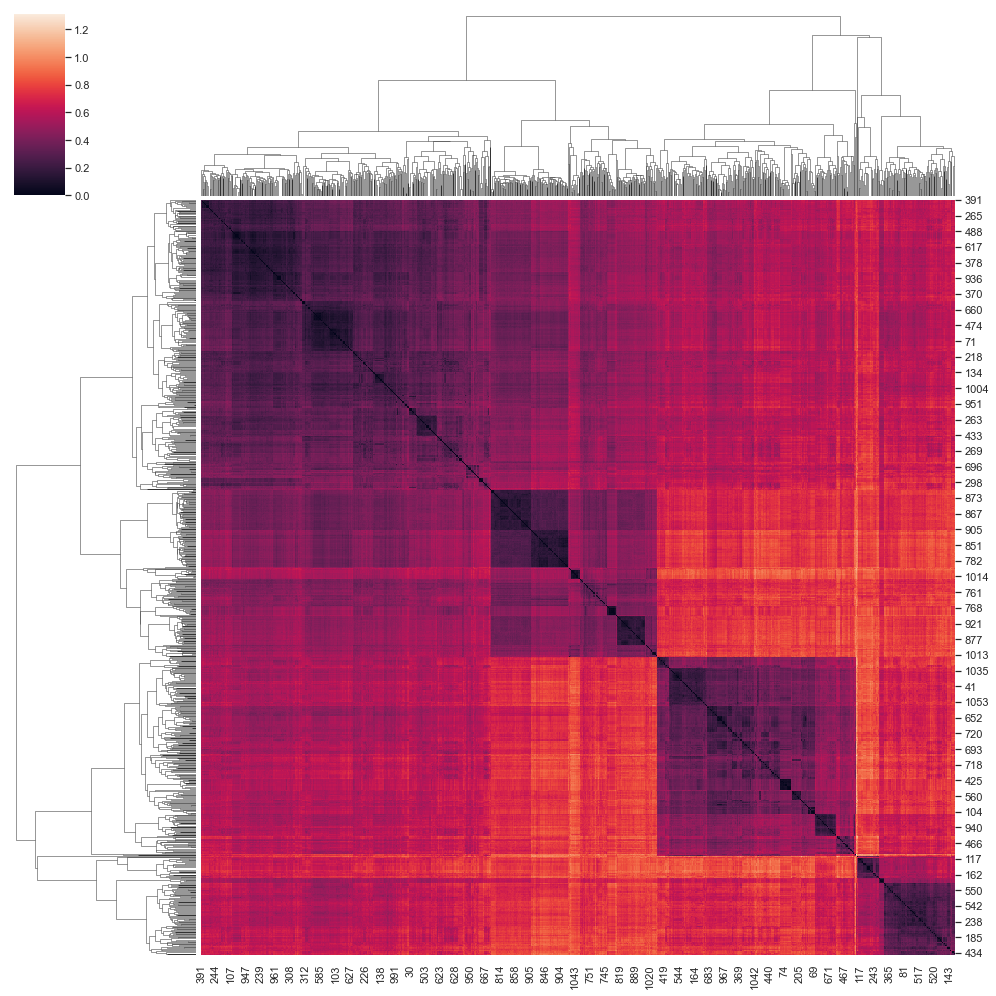

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='white')
sns.clustermap(distDF.drop(columns=['Binds']), method='average', figsize = (14, 14))

The dendrogram, and subsequently the sorting, depends on which method you use to calculate the linkage.

<div class="alert alert-warning"> <font color=black><b>Question 5:</b> Change the method used to contruct the dendrogram to <a href="https://en.wikipedia.org/wiki/Ward%27s_method">Ward's linkage</a>. Use SHIFT+TAB to find which parameter to change.</font> </div>

<div class="alert alert-info"> <font color=black>When observing a heatmap or dendrogram you can use a cut-off to define clusters. Although this sometimes creates well-defined clusters, in most cases, as in the case above, it is difficult to outline the exact boundaries between different clusters. </font> </div>

<div class="alert alert-success"> <font color=black><b>Question 6:</b> How many clusters do you see above? </font> </div>
<div class="alert alert-success"> <font color=black><b>Question 7:</b> How different are the clusters from each other? </font> </div>

Since a justafiable answer to these question is in many cases diffucult to come by when looking at a heatmap, they are not always useful as a clustering approach. Nonetheless, it creates a good initial overview of the data and whether there are clusters, and is thereby a good initial tool to use. 

<div class="alert alert-info"> <font color=black>As the heatmap and dendrogram are not sufficient, we need to use a different approach to better cluster the data. A problem with distance matrices is that they contain a lot of redundant and irrelevant information that sort of buries the important information. This is where reducing the dimensions of the data can help improve data clustering, by removing this noise. </font> </div>

---

## **Dimensionality Reduction**

Dimensionality reduction is the process of reducing the dimension of your feature set (in our case our distance matrix), thereby having fewer features explaining the same variation in the data as the original features. This is done with the purpose of removing features which are redundant (they do not explain any variation or they correlate with another feature) and to obtain a smaller set of features. This smaller set is often easier to work with computational-wise, but will also enable you to plot the data if you reduce the dimensions of the features to 3 or less. In our case we are interested in reducing the dimensions to 2, so we can plot the data and see if the sequences cluster. It is worth noting, when you reduce the dimensions down to 2, it is highly likely that you have also lost some information. We just hope we will have retained enough to still create meaningful clusters.

<div class="alert alert-info"> <font color=black>We want to use <b>dimensionality reduction</b> to reduce the columns of our distance matrix down to two values, thereby having each protein sequence represented by two values which we can <b>visualize in a scatter plot</b>. In the next part we will introduce three popular methods for reducing the dimensionality of data (<b>PCA</b>, <b>t-SNE</b> and <b>UMAP</b>) and explain some of the pros and cons of each. </font> </div>

### **Principal component analysis (PCA)**

PCA is by far the most commonly used dimensionality reduction method. It is fast and robust and works by calculating which features (columns in our distance matrix) vary the most across the data and defines new abstract features, called principal components, which are mainly based on these highly variable features. This way, it is possible to describe the majority of the variation within a data set with only a few principal components, instead of needing the entire data set. The first principal component describes the largest source of variation and the second, the second most variation and so forth. Only working with the principle components containing the largest variations reduces the redundancy and noise in the data. It also becomes a lot easier to compute on when you remove many columns. You can read more about <a href="http://alexhwilliams.info/itsneuronalblog/2016/03/27/pca/">PCA in-depth here</a> and <a href="https://blog.ephorie.de/intuition-for-principal-component-analysis-pca">the intuition of PCA here</a>.

<div class="alert alert-info"><font color=black><a href="https://scikit-learn.org/stable/index.html">Scikit-learn</a> is a large well-maintained free machine learning library for Python. As the clustering methods we are going to use falls within the unsupervised machine learning category, scikit-learn also has a function for PCA.     

    
First, you need to <b>define the parameters of your PCA</b>. We will only focus on <b>n_components</b>, which is how many values you want to reduce your features to (in our case 2 as we want to visualise them in a 2d scatter plot). Thereafter we can use <b>.fit()</b> to fit the PCA to our data, <b>.transform()</b> to transform our data (e.g. reduces it to 2 dimensions) using an already fitted PCA or <b>.fit_transform()</b> which does both steps simultaneously.     

Below we see how you can reduce the dimensions of our distance matrix with a PCA. Furthermore, if we plot the reduced data and color each protein sequence based on what it binds we start to see some clustering.</font> </div>


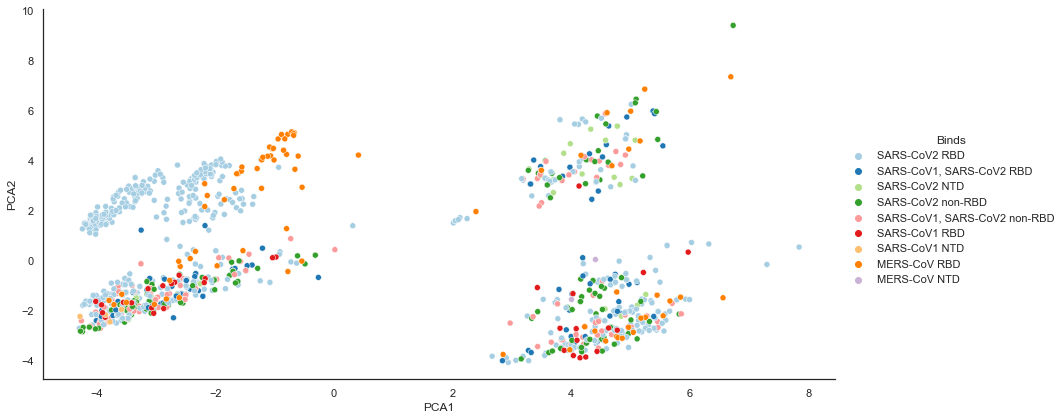

In [18]:
from sklearn.decomposition import PCA

result = PCA(n_components=2).fit_transform(distDF.drop(columns='Binds'))
PCA_df = pd.DataFrame(data=result, index=distDF.Binds, columns=['PCA1', 'PCA2'])

sns.relplot(x='PCA1', y='PCA2', hue=PCA_df.index, data=PCA_df, height=6, aspect=2, palette='Paired')

We can now ask the same question as previously.
<div class="alert alert-success"> <font color=black><b>Question 8:</b> How many clusters are there?  </font> </div>
It has definitely become easier than with a heatmap to answer, yet there is still not a clear distinction between every cluster and there are some of the clusters that look elongated. Another dimensionality reduction method is t-SNE. This method has gained a lot of traction as it in cases where PCA fails, can manage to create nicely separated clusters.

### **t-Distributed Stochastic Neighbor Embedding (t-SNE)**

t-SNE is a more sophisticated method which includes tuning of variables. It is nonlinear and well-suited for embedding high-dimensional data for visualization in a low-dimensional space of two or three dimensions. The main differences compared to PCA is that it is stochastic (it includes a random element which can result in different outputs for the same input), slower and focuses on learning local relationships. <a href="https://www.datacamp.com/community/tutorials/introduction-t-sne?utm_source=adwords_ppc&utm_campaignid=898687156&utm_adgroupid=48947256715&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=229765585183&utm_targetid=aud-299261629574:dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=1006976&gclid=CjwKCAiA-f78BRBbEiwATKRRBHsgZ3raKEJyIf6usGeJb0sLiDV7CNttbi6IjLLvs1uIAwZhEpcN1hoCHa8QAvD_BwE">Here is a more in-depth explanation of t-SNE</a>. This focus on local relationships, results in more compact and defined clusters, which has been one of the reasons for its success.

<div class="alert alert-info"><font color=black>Scikit-learn also has a function for t-SNE. t-SNE also has an <b>n_components</b> parameter, but unlike PCA, t-SNE also has a set of other important parameters with the most important being perplexity. For now we will just use a default set of parameters, but it is worth spending some time understanding how to choose the different parameters. <a href="https://distill.pub/2016/misread-tsne/">This link is a good guide for understanding how to choose different parameters for t-SNE plots</a>.
    
Like with PCA, we use .fit_transform to create of dimensional reduced data.</font> </div>

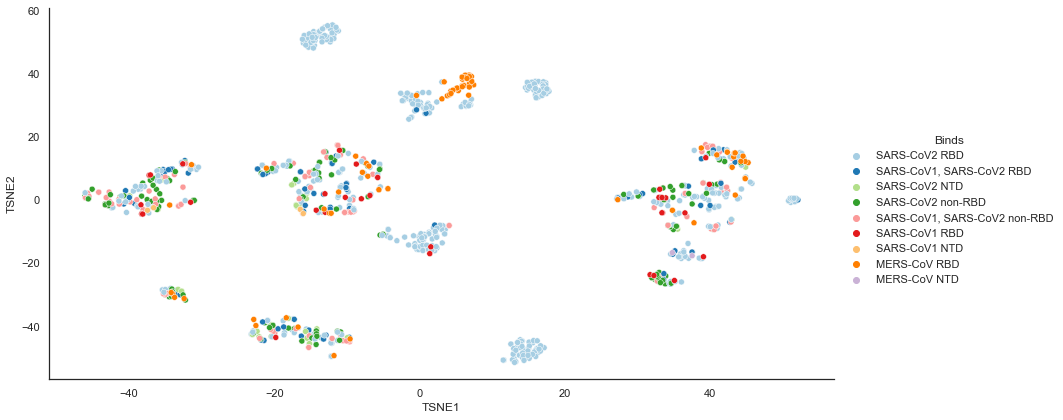

In [19]:
from sklearn.manifold import TSNE
result = TSNE(n_components=2, 
              perplexity=30, 
              n_iter=1000,
              random_state=42).fit_transform(distDF.drop(columns='Binds'))
TSNE_df = pd.DataFrame(data=result, index=distDF.Binds, columns=['TSNE1', 'TSNE2'])

sns.relplot(x='TSNE1', y='TSNE2', hue=TSNE_df.index, data=TSNE_df, height=6, aspect=2, palette='Paired')

<div class="alert alert-info"><font color=black>The popularity of t-SNE is understandable as we can clearly see the more compact and well-defined clusters it creates compared to PCA. A downside, other than it being slower, is that it lacks global information (the distance between clusters have no meaning), which is better preserved in PCA. A way to visualise this is by changing the random_state and observing how the clusters contain more or less the same sequences, but are placed differently around the plot. You therefore can not use the distances between clusters as a proxy for how related these clusters are to each other.</font> </div>

The newest of the dimensionality reduction methods we will introduce is <b>UMAP</b>. The method has an increased speed over t-SNE and includes some global information, although the latter has been questioned by <a href="https://www.biorxiv.org/content/10.1101/2019.12.19.877522v1">many</a>.

### **Uniform Manifold Approximation and Projection (UMAP)**

<a href="https://umap-learn.readthedocs.io/en/latest/">UMAP</a> is much faster than t-SNE, while, as alleged by its authors, taking into account both the local and global correlations. It has similar inner workings as t-SNE and a more in-depth explanation can be found <a href="https://umap-learn.readthedocs.io/en/latest/how_umap_works.html">here (from the authors)</a> and <a href="https://pair-code.github.io/understanding-umap/">here (from a different source)</a>. The latter source also gives a nice overview of how to interpret and use UMAPs parameters.

<div class="alert alert-info"><font color=black>
    <b>UMAP</b> is not yet available through scikit-learn, but can be accessed by installing umap-learn. Additionally, it has been designed to be compatible with scikit-learn and uses the same commands. We can therefore as with PCA and t-SNE use fit_transform(). Again, we have the parameter n_components and some additional new parameters, of which spread, min_dist and n_neighbors are the most important. Spread and min_dist relates to how compact the clusters are, while n_neighbors is similar to perplexity in t-SNE.</font> </div>

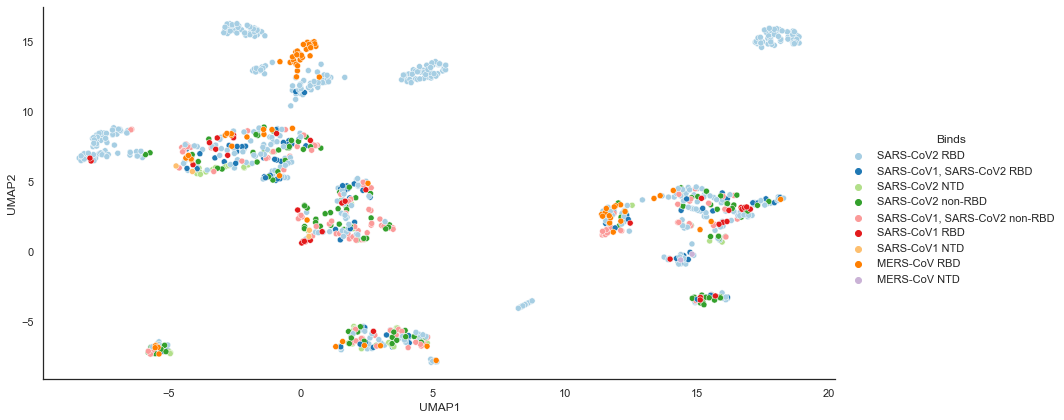

In [20]:
import umap

result = umap.UMAP(n_components=2, 
                  spread=1, 
                  min_dist=.5, 
                  n_neighbors=30, 
                  random_state=42
                 ).fit_transform(distDF.drop(columns='Binds'))

UMAP_df = pd.DataFrame(data=result, index=distDF.Binds, columns=['UMAP1', 'UMAP2'])

sns.relplot(x='UMAP1', y='UMAP2', hue=UMAP_df.index, data=UMAP_df, height=6, aspect=2, palette='Paired')

The UMAP clustering looks very similar to t-SNE, which in turn is more well-defined than PCA. 

<div class="alert alert-success"> <font color=black><b>Question 9:</b> How many clusters are there?  </font> </div>

From using UMAP it has definitely become easier to split the sequences into clusters with the naked eye, but this can be quite subjective. For a more objective approach, a clustering algorithm can be used. A well-known algorithm is DBSCAN.

## **Density-Based Spatial Clustering of Applications with Noise (DBSCAN)**

DBSCAN works by clustering a set of data points into an inferred set of clusters. As it infers the number of clusters, it does not require the number of clusters as a parameter making it effective at discovering clusters of arbitrary shape. For us, this means we do not have to worry about guessing how many clusters there are, it will figure that out itself. <a href="https://blog.dominodatalab.com/topology-and-density-based-clustering/">An in-depth explanation can be found here</a>.

<div class="alert alert-info"><font color=black>Here we use <b>DBSCAN</b> to objectively define the clusters based on our dimensionality reduced data. We use the UMAP reduced data, but you can change this if you think the t-SNE created better clusters. DBSCAN is conveniently also found in scikit-learn, but instead of the .fit_transform() scikit-learn’s DBSCAN uses .fit_predict(). The main parameters are eps (the maximum distance between two samples for them to be considered neighbors) and min_samples (the minimum number of neighbors needed to form a cluster). </font></div>

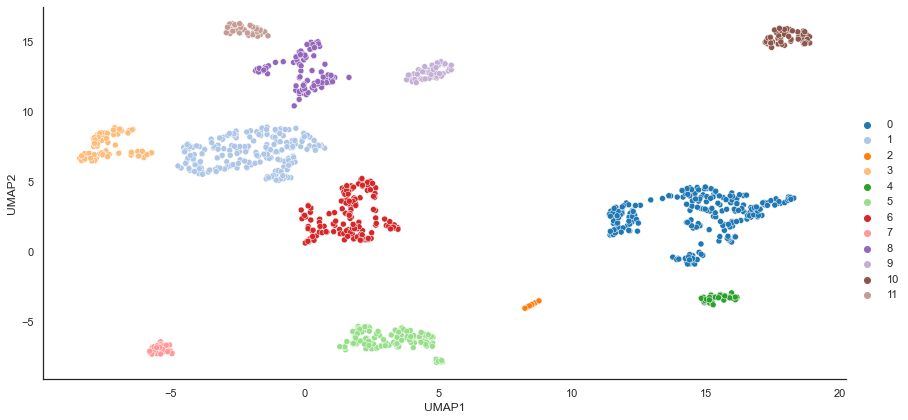

In [21]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=1, min_samples=5).fit_predict(UMAP_df[['UMAP1','UMAP2']])

sns.relplot(x='UMAP1', y='UMAP2', hue=clustering, data=UMAP_df, height=6, aspect=2, legend='full', palette='tab20')

The purpose of our analysis is to find and understand patterns within our protein sequences. What we have done so far, creating clusters which divides the protein sequences into groups, has been the leg work for this. From the creation of these clusters we can now look into the different groups of protein sequences, searching for patterns and differences. To help us do this, sequence logos (or logoplots) are an efficient and visually pleasing method for depicting the consensus and diversity of sequences. In our case we will be using <a href="https://logomaker.readthedocs.io/en/latest/">Logomaker</a>.

### **Sequence Logos (for comparing clusters)**

A logoplot, or sequence logo, is a graphical representation of the sequence conservation. It is created from a multiple sequence alignment and depicts the conservation and diversity of the different amino acids at each position in the MSA. The higher an amino acid the more conserved it is. The conservation of each amino acid at each position can be calculated in different ways, either by count, frequency or Shannon's information. Shannon's information is measured in bits and is calculated in a particular way. The usefulness of Shannon's information is that the overall height of the stack of amino acids indicates the sequence conservation at that position, while the height of the individual amino acids within the stack indicates the relative frequency of each amino at that position. This gives us a clear distinction between conserved and diverse regions. Similar to Shannon's information, there is also information values described by Schneider and Stephens, which are the values used by Logomaker. <a href=”http://resources.qiagenbioinformatics.com/manuals/clcgenomicsworkbench/650/BE_Sequence_logo.html”>Some further reading about logoplots can be found here</a>.

For us, this means we can visualise the conserved and the diverse regions of the sequences in our clusters. This can be used to compare clusters to each other, but also to see which regions are variable within a cluster.

<div class="alert alert-info"><font color=black>The first thing we want to look at, is the sequence differences between two clusters containing antibodies binding to the same virus and epitope. For this we will use logoplots, which we will create using the <b>Logomaker</b> package.
    
    
From the UMAP and DBSCAN plot, we can see that the clusters 10, 11 and 12 only contain antibodies binding to the RBD epitope on SAR-CoV2. Lets try to compare cluster 10 and 11. </font></div>

In [22]:
clust1 = 10
clust2 = 11

<div class="alert alert-info"><font color=black>For logoplots we need MSAs. Luckily we created those earlier, so we just need to take out the sequences corresponding to the clusters we are looking at. This is done using .query().</font></div> 

In [23]:
logoalign1 = pd.concat([msaDF, pd.Series(clustering, name='Cluster')], axis=1).query("Cluster==@clust1")
logoalign2 = pd.concat([msaDF, pd.Series(clustering, name='Cluster')], axis=1).query("Cluster==@clust2")

<div class="alert alert-info"><font color=black>Finally, we create the logo matrices using logomaker and plot them. Notice how we choose to define the conservation of the amino acids using <b>information</b>. Try and change this to get a feeling of why information is a good metric.</font></div>

In [24]:
import logomaker

tologo1 = logomaker.alignment_to_matrix(logoalign1.AlignedSequence, to_type='information')
tologo2 = logomaker.alignment_to_matrix(logoalign2.AlignedSequence, to_type='information')

Fontconfig warning: ignoring UTF-8: not a valid region tag


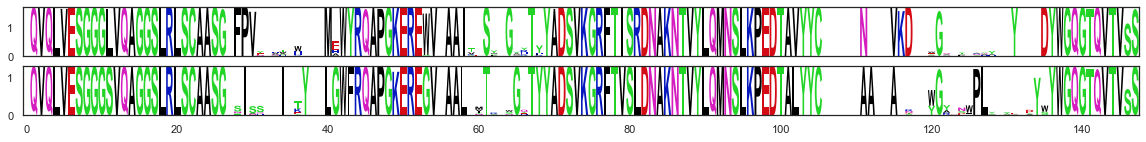

In [25]:
fig, ax = plt.subplots(2,1,figsize=(20, 2))

logomaker.Logo(tologo1, ax=ax[0], center_values=True)
logomaker.Logo(tologo2, ax=ax[1], center_values=True)

ax[0].set_ylim(bottom=0)
ax[1].set_ylim(bottom=0)
plt.show()

<div class="alert alert-success"> <font color=black><b>Question 10:</b> Where are the conserved regions? </font></div>
<div class="alert alert-success"> <font color=black><b>Question 11:</b> What are the main differences between the two clusters? </font></div> 
<div class="alert alert-success"> <font color=black><b>Question 12:</b> Why are there some areas with no amino acids? </font></div> 
    
<div class="alert alert-info"><font color=black>From the logoplots above we can get a feeling for why the two clusters were formed (within themselves they are extremely similar sequences) and why they, although the two clusters are very similar except a few residues, are still separated into two clusters. Our clustering has thereby given us an idea of two possible motifs for antibodies binding to the same epitope on the same virus.
<br><br>

The above is quite interesting, but what about our clusters which consists of antibodies binding different viruses and proteins? To check this we can create a logoplot of a cluster containing antibodies binding to a wide range of epitopes, such as cluster 5.</font></div>

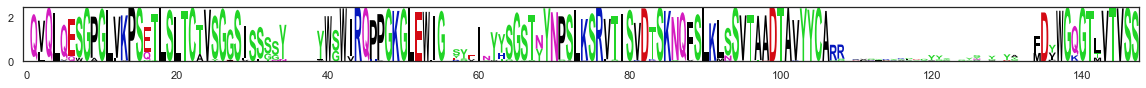

In [26]:
clust = 5

logoalign = pd.concat([msaDF, pd.Series(clustering, name='Cluster')], axis=1).query("Cluster==@clust")
tologo = logomaker.alignment_to_matrix(logoalign.AlignedSequence, to_type='information')

fig, ax = plt.subplots(1,1,figsize=(20, 1))
logomaker.Logo(tologo, ax=ax, center_values=True)
ax.set_ylim(bottom=0)
plt.show()

<div class="alert alert-info"><font color=black>Looking at cluster 5, which contains every single data type, we get the above logoplot. Unlike the previous logoplots, there is much more variation in how conserved the individual amino acids are. This could indicate that this cluster should have been divided into smaller clusters, although, it is understandable why the dimensionality reduction and clustering algorithms have ended up clustering these sequences together, given they are quite similar in sequence. We can also see how there is a region from residue 110-130 which is highly variable, again indicating these sequences have been wrongfully clustered together.</font></div>

<div class="alert alert-info"><font color=black><b>Another way to create logoplots</b> is using the <a href="https://biolib.com/bio-utils/LogoPlot">LogoPlot</a> application from <a href="https://biolib.com">BioLib</a>. BioLib is a collection of bioinformatics apps that is built with privacy and data security in mind; your input data stays on your machine to ensure the confidentiality of your data. Conveniently, the BioLib library can also be accessed in Jupyter by installing the <b>pybiolib</b> Python package. From the package, the LogoPlot function can be imported and used with the following steps. First, you save the alignment which you want to plot: we do this using the pandas .to_csv() function. Thereafter, you create the plot using LogoPlot. For the parameters, remember to choose the file you saved as the <b>--infile</b> and shanon for the <b>--height_type</b> (shanon is Shannon's Information as mentioned earlier). Additionally, you can also choose the max length before the logoplot will continue on another line (using <b>--max_length</b>). For more information about how to use this function, <a href="https://biolib.com/bio-utils/LogoPlot">read this</a>.
<b></b>   
   Using LogoPlot gives a nice default figure, as well as saving the logoplot in the biolib_results folder.
</font></div>

In [27]:
logoalign2.to_csv('logo1.csv', index=False, header=False)

In [39]:
!pip3 install pybiolib

2021-08-20 21:28:57,954 | INFO : Loaded package: bio-utils/LogoPlot


In [38]:
import biolib
LogoPlot = biolib.load('bio_utils/LogoPlot')

result = LogoPlot(args="--sequence_type auto --infile ./logo1.csv --sequence_weighting none --weight_on_prior 0 --height_type shanon --cmap auto --max_length 75 --output_format png")
result.ipython_markdown()

2021-08-20 21:28:59,582 | INFO : Started compute node
2021-08-20 21:29:00,621 | INFO : Compute Node: Initializing
2021-08-20 21:29:00,651 | INFO : Running job with id 379d50d1-43a9-4ae0-9ce8-69888b135f49
2021-08-20 21:29:02,133 | INFO : Compute Node: Downloading Source Files...
2021-08-20 21:29:02,133 | INFO : Compute Node: Pulling images...
2021-08-20 21:29:27,752 | INFO : Compute Node: Computing...
2021-08-20 21:29:33,773 | INFO : Compute Node: Result Ready


![picture](./biolib_results/SeqLogo.png)


**You are almost done!**
During this notebook we have mainly been using default values and the simplest approach. The following questions are to get you to try and improve the clustering, and thereby the logoplots, in order to better understand the data. The main areas to improve are the data preparation, the dimensionality reduction and the clustering. 

<div class="alert alert-warning"> <font color=black><b>Question 13:</b> Can you improve the clustering by excluding less data when preparing it? </font> </div>
<div class="alert alert-warning"> <font color=black><b>Question 14:</b> Does it improve t-SNE and UMAP clustering if you first reduce the dimensions of your data to ~50 with a PCA? </font> </div>
<div class="alert alert-warning"> <font color=black><b>Question 15:</b> Can you optimize the parameters of t-SNE or UMAP to improve the clustering? </font> </div>
<div class="alert alert-warning"> <font color=black><b>Question 16:</b> Can you optimize the parameters of DBSCAN to create better clusters? </font> </div>
<div class="alert alert-warning"> <font color=black><b>Question 17:</b> Why is it that the differences in cluster 10 and 11 are in the same three regions? (Hint: Look up Complementarity-Determining Regions (CDRs)) </font> </div>
<div class="alert alert-warning"> <font color=black><b>Question 18:</b> As mentioned in the data preparation, we have been working with both antibody and nanobody sequences. Change the colors to correspond to either antibody or nanobody and see how cluster. </font> </div>

We have now come to the end of this notebook. We hope you have learned how to do some initial analysis, using dimensionality reduction, clustering and logoplots to isolate and investigate protein sequence patterns in a set of highly related proteins. **To allow you to try and work on a problem from scratch, we will give you a similar data set, which you will be working on in groups on the morning of the 25th November.**

**If you want to read more about us, check out our website at https://biodatascience101.github.io/!**